In [46]:
import pandas as pd
import time
import numpy as np

In [2]:
data = pd.read_csv('drug_consumption.csv')
data_readable = pd.read_csv('drug_consumption.csv')
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [4]:
# Check for missing values
data.isna().any()

ID           False
Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

In [5]:
age_col = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }

data_readable['Age'] = data_readable['Age'].replace(age_col)

In [6]:
gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
data_readable['Gender'] = data_readable['Gender'].replace(gender_col)

In [7]:
education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
data_readable['Education'] = data_readable['Education'].replace(education_col)

In [8]:
country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
data_readable['Country'] = data_readable['Country'].replace(country_col)

In [9]:
ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }
data_readable['Ethnicity'] = data_readable['Ethnicity'].replace(ethnicity_col)

In [10]:
usage_col = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }
data_readable['Alcohol'] = data_readable['Alcohol'].replace(usage_col)
data_readable['Amphet'] = data_readable['Amphet'].replace(usage_col)
data_readable['Amyl'] = data_readable['Amyl'].replace(usage_col)
data_readable['Benzos'] = data_readable['Benzos'].replace(usage_col)
data_readable['Caff'] = data_readable['Caff'].replace(usage_col)
data_readable['Cannabis'] = data_readable['Cannabis'].replace(usage_col)
data_readable['Choc'] = data_readable['Choc'].replace(usage_col)
data_readable['Coke'] = data_readable['Coke'].replace(usage_col)
data_readable['Crack'] = data_readable['Crack'].replace(usage_col)
data_readable['Ecstasy'] = data_readable['Ecstasy'].replace(usage_col)
data_readable['Heroin'] = data_readable['Heroin'].replace(usage_col)
data_readable['Ketamine'] = data_readable['Ketamine'].replace(usage_col)
data_readable['Legalh'] = data_readable['Legalh'].replace(usage_col)
data_readable['LSD'] = data_readable['LSD'].replace(usage_col)
data_readable['Meth'] = data_readable['Meth'].replace(usage_col)
data_readable['Mushrooms'] = data_readable['Mushrooms'].replace(usage_col)
data_readable['Nicotine'] = data_readable['Nicotine'].replace(usage_col)
data_readable['Semer'] = data_readable['Semer'].replace(usage_col)
data_readable['VSA'] = data_readable['VSA'].replace(usage_col)

In [11]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [12]:
data.drop('ID', axis=1, inplace=True)
data_readable.drop('ID', axis=1, inplace=True)
data_readable.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [13]:
usage_col = {
    'CL0': 0,
    'CL1': 0,
    'CL2': 0,
    'CL3': 1,
    'CL4': 1,
    'CL5': 1,
    'CL6': 1,
    }
data['Alcohol'] = data['Alcohol'].replace(usage_col)
data['Amphet'] = data['Amphet'].replace(usage_col)
data['Amyl'] = data['Amyl'].replace(usage_col)
data['Benzos'] = data['Benzos'].replace(usage_col)
data['Caff'] = data['Caff'].replace(usage_col)
data['Cannabis'] = data['Cannabis'].replace(usage_col)
data['Choc'] = data['Choc'].replace(usage_col)
data['Coke'] = data['Coke'].replace(usage_col)
data['Crack'] = data['Crack'].replace(usage_col)
data['Ecstasy'] = data['Ecstasy'].replace(usage_col)
data['Heroin'] = data['Heroin'].replace(usage_col)
data['Ketamine'] = data['Ketamine'].replace(usage_col)
data['Legalh'] = data['Legalh'].replace(usage_col)
data['LSD'] = data['LSD'].replace(usage_col)
data['Meth'] = data['Meth'].replace(usage_col)
data['Mushrooms'] = data['Mushrooms'].replace(usage_col)
data['Nicotine'] = data['Nicotine'].replace(usage_col)
data['Semer'] = data['Semer'].replace(usage_col)
data['VSA'] = data['VSA'].replace(usage_col)

In [14]:
all_inputs = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].values

all_labels = data['Heroin'].values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt


(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=0)

k_fold = KFold(5);

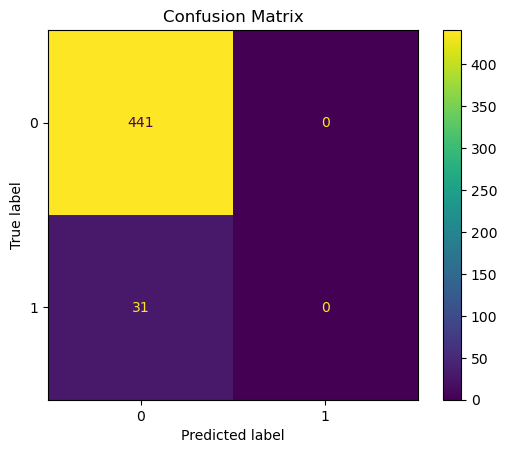

Best score: 0.9391449264466332
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}


In [55]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=0)

parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'max_depth': [None, 2, 3, 4, 5, 10, 15],
                  'min_samples_split': [2, 3, 5, 10, 15, 20, 25],
                  'min_samples_leaf': [3, 4, 5, 10, 15],
                  'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(decision_tree_classifier, parameter_grid, cv=k_fold)

starting_time = time.perf_counter()
grid_search.fit(training_inputs, training_classes)
ending_time = time.perf_counter()
training_time_dt = (ending_time - starting_time)

starting_time = time.perf_counter()
prediction = grid_search.predict(testing_inputs)
ending_time = time.perf_counter()
prediction_time_dt = (ending_time - starting_time)

confusion_matrix = metrics.confusion_matrix(testing_classes, prediction)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
matrix_display.plot()
plt.title('Confusion Matrix')
plt.show()

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
best_decision_tree_estimator = grid_search.best_estimator_


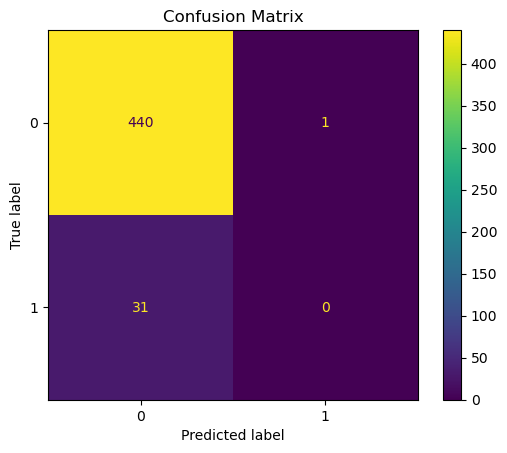

Best score: 0.9384382126657144
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 10}


In [56]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(random_state=0, n_jobs=-1)

parameter_grid = [
    {'n_estimators': [10, 25, 50, 100, 250, 500],
     'criterion': ['gini'],
     'max_depth': [None],
     'min_samples_split': [2],
     'min_samples_leaf': [10],
     'max_features': ['sqrt'],
     'max_samples': [None]},
    {'n_estimators': [5],
     'criterion': ['gini', 'entropy', 'log_loss'],
     'max_depth': [None, 3],
     'min_samples_split': [2, 3],
     'min_samples_leaf': [5, 10],
     'max_features': [None, 'sqrt', 'log2'],
     'max_samples': [2, 3, 5]}]

grid_search = GridSearchCV(random_forest_classifier, parameter_grid, cv=k_fold)

starting_time = time.perf_counter()
grid_search.fit(training_inputs, training_classes)
ending_time = time.perf_counter()
training_time_rf = (ending_time - starting_time)


starting_time = time.perf_counter()
prediction = grid_search.predict(testing_inputs)
ending_time = time.perf_counter()
prediction_time_rf = (ending_time - starting_time)

confusion_matrix = metrics.confusion_matrix(testing_classes, prediction)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
matrix_display.plot()
plt.title('Confusion Matrix')
plt.show()

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
best_random_forest_estimator = grid_search.best_estimator_

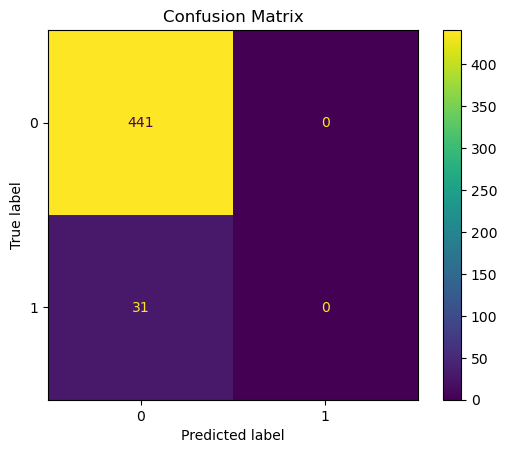

Best score: 0.9384382126657144
Best parameters: {'C': 1.0, 'kernel': 'linear', 'tol': 0.001}


In [57]:
from sklearn.svm import SVC

svc_classifier = SVC(random_state=0)

parameter_grid = [
    {'C': [1.0, 2.0, 5.0, 10.0],
     'kernel': ['linear'],
     'tol': [0.001, 0.01]},
    {'C': [1.0, 2.0, 5.0, 10.0],
     'kernel': ['poly'],
     'degree': [2, 3, 4, 5, 6, 7],
     'gamma': ['scale', 'auto'],
     'tol': [0.001, 0.01]},
    {'C': [1.0, 2.0, 5.0, 10.0],
     'kernel': ['rbf', 'sigmoid'],
     'gamma': ['scale', 'auto'],
     'tol': [0.001, 0.01]}]

grid_search = GridSearchCV(svc_classifier, parameter_grid, cv=k_fold)

starting_time = time.perf_counter()
grid_search.fit(training_inputs, training_classes)
ending_time = time.perf_counter()
training_time_svm = (ending_time - starting_time)

starting_time = time.perf_counter()
prediction = grid_search.predict(testing_inputs)
ending_time = time.perf_counter()
prediction_time_svm = (ending_time - starting_time)

confusion_matrix = metrics.confusion_matrix(testing_classes, prediction)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
matrix_display.plot()
plt.title('Confusion Matrix')
plt.show()

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
best_svc_estimator = grid_search.best_estimator_

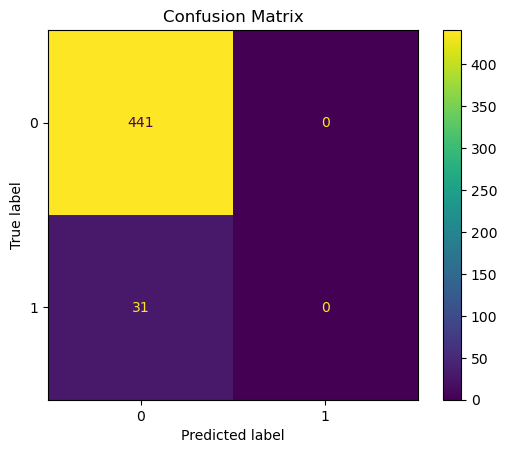

Best score: 0.9384407187429517
Best parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}


In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_jobs=-1)

parameter_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(knn_classifier, parameter_grid, cv=k_fold)

starting_time = time.perf_counter()
grid_search.fit(training_inputs, training_classes)
ending_time = time.perf_counter()
training_time_knn = (ending_time - starting_time)


starting_time = time.perf_counter()
prediction = grid_search.predict(testing_inputs)
ending_time = time.perf_counter()
prediction_time_knn = (ending_time - starting_time)

confusion_matrix = metrics.confusion_matrix(testing_classes, prediction)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
matrix_display.plot()
plt.title('Confusion Matrix')
plt.show()

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
best_knn_estimator = grid_search.best_estimator_

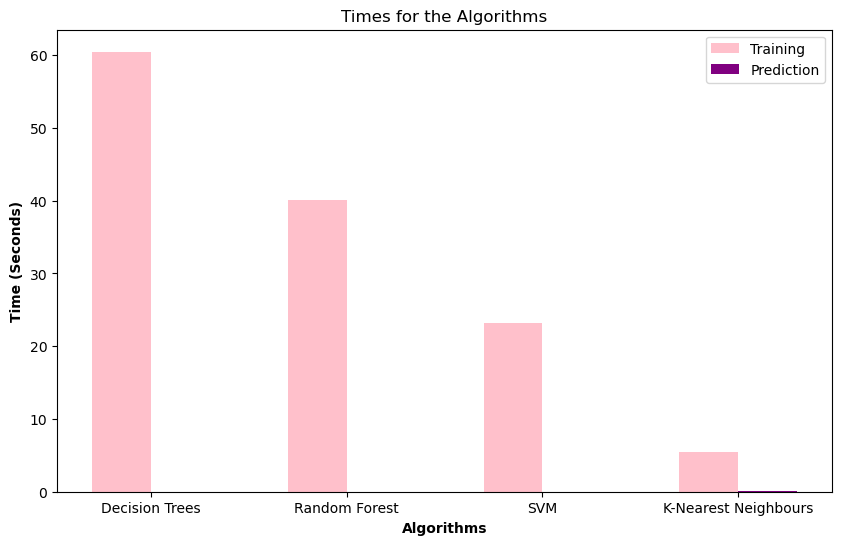

In [60]:
alg = ['Decision Trees', 'Random Forest', 'SVM', 'K-Nearest Neighbours']
training_times = [training_time_dt, training_time_rf, training_time_svm, training_time_knn]
prediction_times = [prediction_time_dt, prediction_time_rf, prediction_time_svm, prediction_time_knn]

bars = 0.30
pos1 = np.arange(len(training_times))
pos2 = [x + bars for x in pos1]

plt.figure(figsize=(10, 6))
plt.bar(pos1, training_times, color='pink', width=bars, label='Training')
plt.bar(pos2, prediction_times, color='purple', width=bars, label='Prediction')

plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Time (Seconds)', fontweight='bold')
plt.xticks([row + bars /2 for row in range(len(training_times))], alg)
plt.legend()
plt.title('Times for the Algorithms')

plt.show()